Load Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("../data/cleaned.csv")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,0,3,11,1,69
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,0,3,11,0,72
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,0,3,11,0,61
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,0,3,11,0,42
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,0,3,11,0,45


Select Features for Clustering

In [25]:
X = df.drop(columns=["Response"])


Feature Scaling

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Find Optimal Number of Clusters

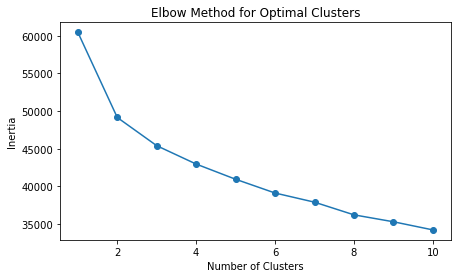

In [27]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(7,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


Apply K-Means Clustering

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Cluster
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,3,11,1,69,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,3,11,0,72,3
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,3,11,0,61,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,3,11,0,42,3
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,3,11,0,45,3


Analyze Clusters

In [29]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5594.422088,1962.524962,2.680787,3.720121,58042.158850,0.204236,0.930408,324.995461,48.692890,435.077156,...,0.059002,0.122542,0.012103,0.027231,0.0,0.010590,3.0,11.0,0.105900,63.475038
1,5627.160221,1969.007366,2.318600,3.791897,77275.719153,0.047882,0.160221,321.974217,49.679558,597.488029,...,0.077348,0.106814,0.254144,0.206262,0.0,0.003683,3.0,11.0,0.268877,56.992634
2,5172.566667,1968.133333,2.600000,3.900000,71054.833333,0.066667,0.433333,367.466667,48.666667,898.666667,...,0.233333,0.733333,0.566667,0.433333,1.0,0.000000,3.0,11.0,0.666667,57.866667
3,5584.294235,1972.843936,2.239563,3.697813,34348.745030,0.827038,0.416501,331.772366,49.088469,41.584493,...,0.074553,0.005964,0.000000,0.000994,0.0,0.011928,3.0,11.0,0.097416,53.156064


Visualize Clusters using PCA

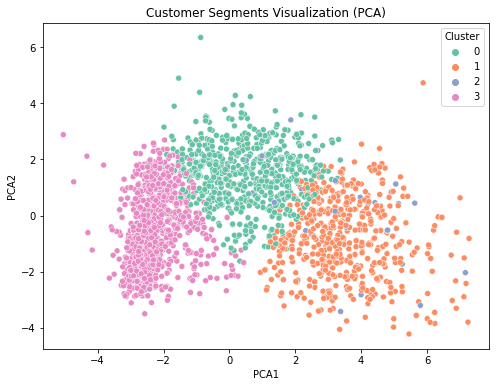

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=df
)

plt.title("Customer Segments Visualization (PCA)")
plt.show()
